In [2]:
## import libararys
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### 1-Read the dataset

In [4]:
# Read dataset
data=pd.read_csv(r'D:\ML project & tasks\Advertising.csv')

In [5]:
# display first 10 row
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
# display last 5 row
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


 ### 2-Explore the dataset

In [7]:
# show information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# describetion about dataset
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### 3-Data preprocessing

In [10]:
# drob non important column >> Unnamed: 0 
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
# add new column name is total_spend
data['total_spend']=data['TV'] + data['Newspaper'] + data['Sales']

In [13]:
data.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,321.4
1,44.5,39.3,45.1,10.4,100.0
2,17.2,45.9,69.3,9.3,95.8
3,151.5,41.3,58.5,18.5,228.5
4,180.8,10.8,58.4,12.9,252.1


In [18]:
# show minimum value on all columns 
np.min(data,axis=0)

TV              0.7
Radio           0.0
Newspaper       0.3
Sales           1.6
total_spend    11.0
dtype: float64

In [19]:
# show maximum value on all columns 
np.max(data,axis=0)

TV             296.4
Radio           49.6
Newspaper      114.0
Sales           27.0
total_spend    421.1
dtype: float64

### 4-Data visualization

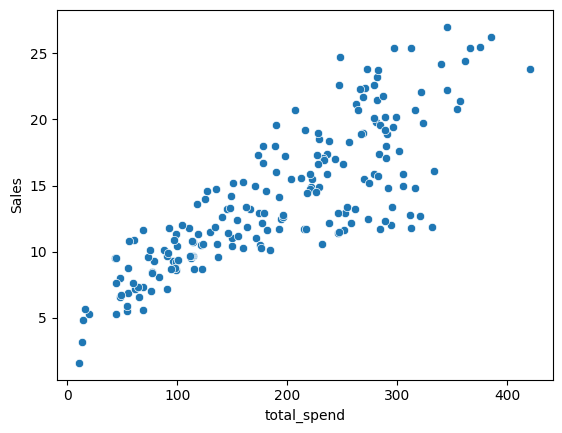

In [16]:
sns.scatterplot(x='total_spend',y='Sales',data=data)
plt.show()

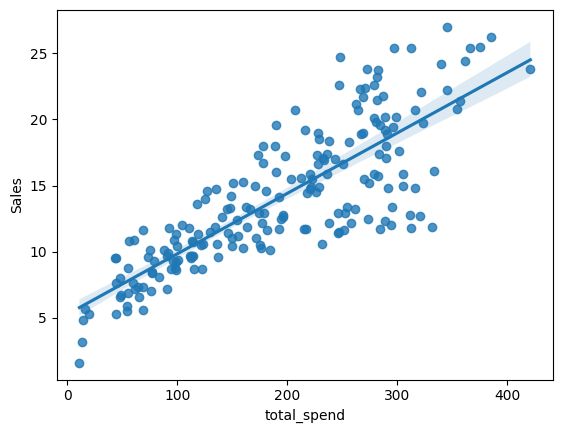

In [17]:
sns.regplot(x='total_spend',y='Sales',data=data)
plt.show()

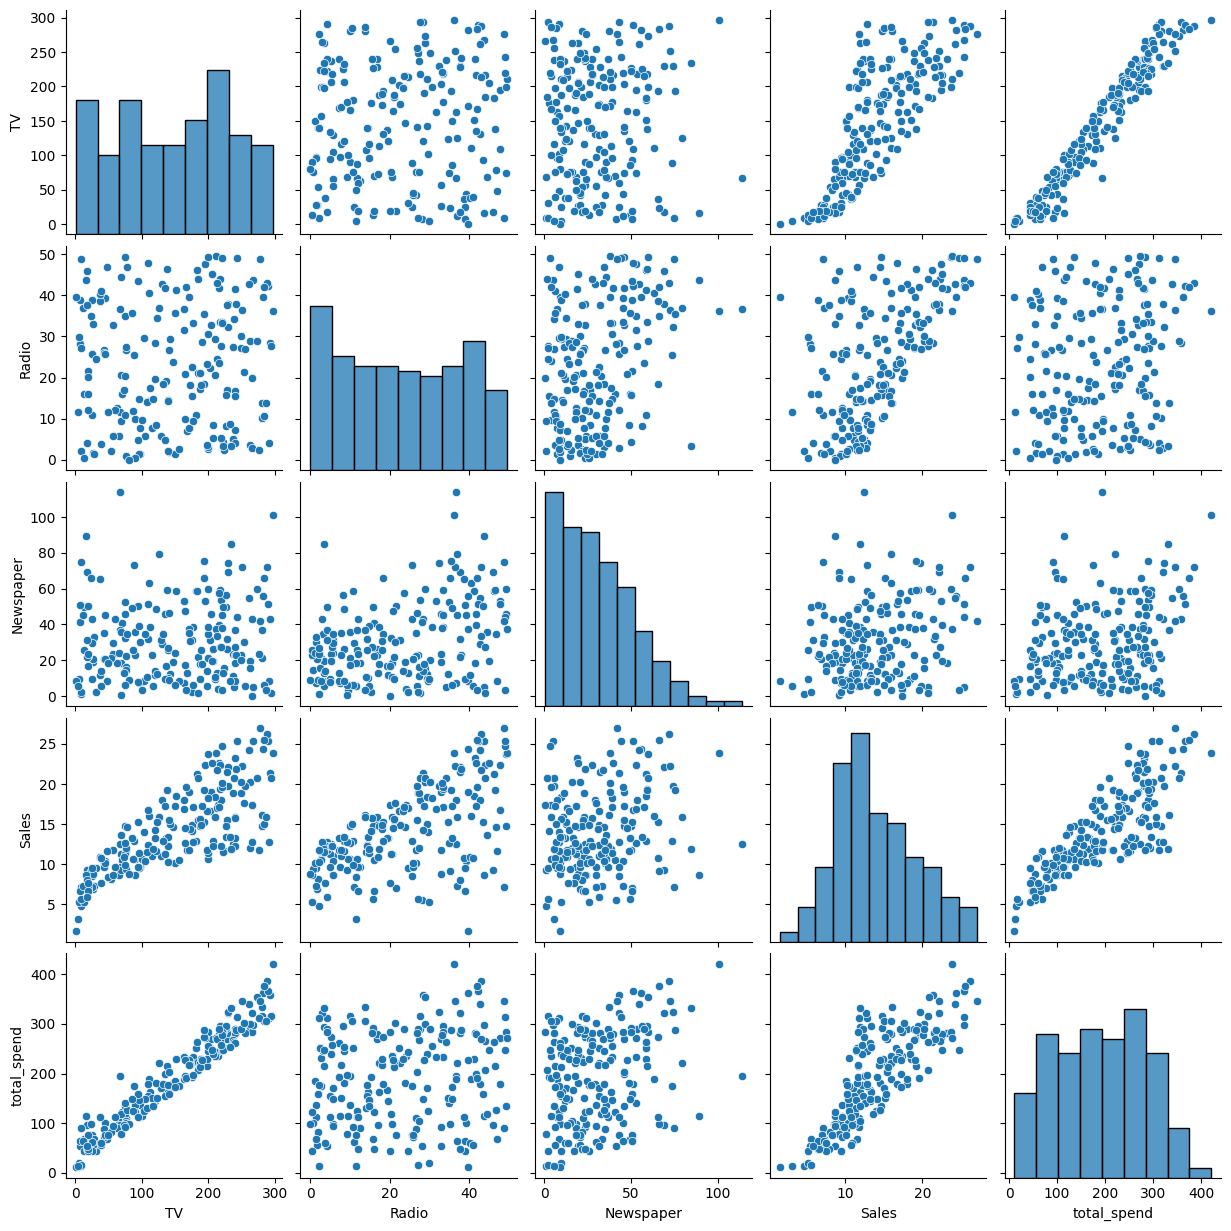

In [20]:
sns.pairplot(data)

In [24]:
# split data into feature (x) and labe (y)
x=data.drop(["Sales",'total_spend'],axis=1)
y=data["Sales"]

In [25]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### 5-Build Model

In [33]:
# split data int train_data and test_data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [35]:
# show shape of train_data 
print("shape is :",x_train.shape)
print("shape is :",y_train.shape)

shape is : (160, 3)
shape is : (160,)


In [36]:
# show shape of test_data
print("shape is :",x_test.shape)
print("shape is :",y_test.shape)

shape is : (40, 3)
shape is : (40,)


In [38]:
# Build linear regression model
from sklearn.linear_model import LinearRegression

In [39]:
# calling of LinearRegression
LR=LinearRegression()

In [40]:
# fit model on train_data (x_train,y_train)
LR.fit(x_train,y_train)

LinearRegression()

In [41]:
# predict model by use test_data (x_test)
y_pred=LR.predict(x_test)

In [46]:
print('first 10 value of y predict =',y_pred[:10])
print(' ')
print('first 10 value of y actual =',y_test.values[:10])

first 10 value of y predict = [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967]
 
first 10 value of y actual = [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9]


In [47]:
# test model by value of data
print(LR.predict([[17.2,45.9,69.3]]))

[12.62381325]


F:\anconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 6-Model evaluation

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)

In [51]:
print('mean_absolute_error =',MAE)
print('mean_squared_error =',MSE)

mean_absolute_error = 1.4607567168117606
mean_squared_error = 3.174097353976104


In [53]:
# Root mean_squared_error
np.sqrt(MSE)

1.7815996615334502